## 3-8-1

In [1]:
import cv2
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [15]:
!conda install -y -c conda-forge jupyter_contrib_nbextensions

Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - jupyter_contrib_nbextensions


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py37hc8dfbb8_0         151 KB  conda-forge
    jupyter_contrib_core-0.3.3 |             py_2          15 KB  conda-forge
    jupyter_contrib_nbextensions-0.5.1|           py37_0        19.4 MB  conda-forge
    jupyter_highlight_selected_word-0.2.0|        py37_1000          13 KB  conda-forge
    jupyter_latex_envs-1.4.6   |        py37_1000         674 KB  conda-forge
    jupyter_nbextensions_configurator-0.4.1|           py37_0         468 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------

done


In [5]:
##################################
#  独自ライブライー： LINE VIEW
# (複数の画像のグラフによる見比べ)
##################################
import cv2;import matplotlib.pyplot as plt;import matplotlib as mpl;from ipywidgets import interact
mpl.rcParams['figure.dpi'] = 140 # グラフで詳細まで見えるように
Imgs_For_Line_View = [] #global変数
Defalut_Y = 20 #global変数

## 使うときは、これを呼ぶ。(双方向バー表示のため、実態をラップ)
def lv( img1, img2=None, img3=None, img4=None, img5=None ):
    global Imgs_For_Line_View
    global Defalut_Y
    Imgs_For_Line_View =  list(filter( lambda x: x is not None, [img1, img2, img3, img4, img5] ) )# Noneを削除
    Defalut_Y = Imgs_For_Line_View[0].shape[0] // 2 # Yの初期値。現状うまく動かず
    interact( lv_real, y = (0, Defalut_Y*2-1, 1) , fig_width=(0,5,0.05), fig_height=(0,5,0.05) ) # 双方向呼び出し

## lvの実体
def lv_real( fig_width=1, fig_height=1, y=Defalut_Y,  ):
    # 図を作成
    plt.figure(figsize=(4 * fig_width,4 * fig_height));plt.xticks(fontsize=4);plt.yticks(fontsize=4)
    # 画像ごとにグラフ線をplot
    for idx, tmp_img in enumerate( Imgs_For_Line_View):
        if  len(tmp_img.shape) >2 and tmp_img.shape[2] >1 : # RGBの３色残ってるときは、白黒に。
            tmp_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        h0, w0 = Imgs_For_Line_View[idx].shape[0], Imgs_For_Line_View[idx].shape[1] # 画像の高さ幅

        # 作図用にピクセルを参照
        tmp_pixel_list=[]
        for x in range(w0):
            pix = tmp_img[y, x]
            tmp_pixel_list.append(pix)
        plt.plot( tmp_pixel_list, label=idx, linewidth = 0.3 )

    plt.legend()
    plt.show()


In [4]:
import cv2
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
def mplot(img, img2=None):

    img = img.astype(np.uint8)
    im4p = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if img2 is None:
        #     plt.subplot(121)
        plt.imshow(im4p)

    else:
        img2 = img2.astype(np.uint8)
        plt.subplot(121)
        plt.imshow(im4p)

        im4p2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
        plt.subplot(122)
        plt.imshow(im4p2)

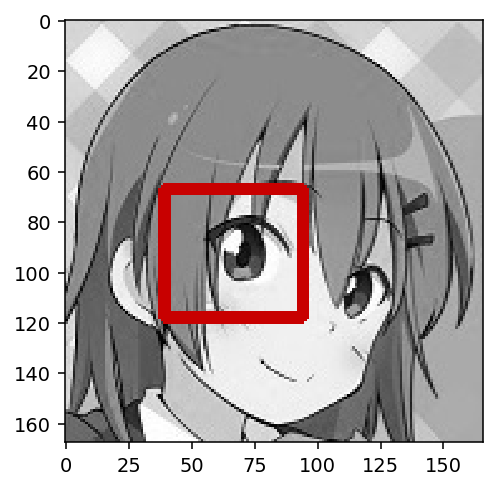

In [14]:
def main():
    img = cv2.imread("sample/3-8/input.png")
    
    
    temp = cv2.imread("sample/3-8/temp.png")
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    temp = cv2.cvtColor(temp, cv2.COLOR_RGB2GRAY)

    h, w = temp.shape
    
    match = cv2.matchTemplate(gray, temp, cv2.TM_SQDIFF)
    min_value, max_value, min_pt, max_pt = cv2.minMaxLoc(match)
    pt = min_pt
    
    
    cv2.rectangle(img, (pt[0], pt[1]) , (pt[0] + w, pt[1] + h ), (0, 0, 200), 3)
    mplot(img)
#     mplot(temp)

main()